# Snowplow Problem

## Problem Description

In this problem, a snowplow is required to clear the snow in front of `n` houses positioned on a one-dimensional road. The snowplow starts from position `0`. The goal is to minimize the average waiting time of the houses. The travel time for the snowplow is equivalent to the distance it travels. If there are multiple houses at the same position, the snowplow takes no extra time to clear the snow at these houses.

## Solution Approach

To minimize the average waiting time for the houses, the snowplow should first move to the closest house to its starting position and then continue in the same direction clearing the snow in front of the houses sequentially.

### Step 0 initialisation du projet

Import the libraries

In [230]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

### Step 1 create the houses

In [231]:
def create_houses(n):
    houses = np.random.uniform(-1000, 1000, n)
    houses = [(i, h) for i, h in enumerate(houses)]
    houses = sorted(houses, key=lambda x: x[1])
    return houses


### Step 2 Create a way to have the average time

In [232]:
def calculate_average_wait_time(order, houses):
    snowplow_pos = 0
    total_wait_time = 0
    cumulative_time = 0

    for house_id in order:
        house_pos = next(h[1] for h in houses if h[0] == house_id)
        travel_time = abs(snowplow_pos - house_pos)
        cumulative_time += travel_time
        total_wait_time += cumulative_time
        snowplow_pos = house_pos

    avg_wait_time = total_wait_time / len(order)
    return avg_wait_time


### Step 3 Let's code some algorythms

##### 1. Greedy approach, the snowplow start to go to the right keep the direction, when he reachs the last house he moves to the other side

Algorithm Complexities

- **Sorting the houses:**
\begin{align*}
\text{Time Complexity} &: O(n \log n)
\end{align*}

- **Overall Time Complexity:**
\begin{align*}
\text{Time Complexity} &: O(n \log n)
\end{align*}

- **Space Complexity:**
\begin{align*}
\text{Space Complexity} &: O(n)
\end{align*}

In [233]:
def greedy_approach(houses):
    right_houses = [house for house in houses if house[1] > 0]
    left_houses = [house for house in houses if house[1] <= 0]
    order = [house[0] for house in right_houses] + [house[0] for house in reversed(left_houses)]
    avg_wait_time = calculate_average_wait_time(order, houses)
    return order, avg_wait_time


#### Two pointer approach, the snowplow will go to the closest house

Algorithm Complexities

- **Sorting the houses:**
\begin{align*}
\text{Time Complexity} &: O(n \log n)
\end{align*}

- **Iterating through houses using two pointers:**
\begin{align*}
\text{Time Complexity} &: O(n)
\end{align*}

- **Overall Time Complexity:**
\begin{align*}
\text{Time Complexity} &: O(n \log n)
\end{align*}

- **Space Complexity:**
\begin{align*}
\text{Space Complexity} &: O(n)
\end{align*}


In [234]:
def two_pointers_approach(houses):
    left_houses = [house for house in houses if house[1] < 0][::-1]
    right_houses = [house for house in houses if house[1] >= 0]
    order = []
    snowplow_pos = 0
    left_ptr, right_ptr = 0, 0
    while left_ptr < len(left_houses) and right_ptr < len(right_houses):
        left_distance = abs(snowplow_pos - left_houses[left_ptr][1])
        right_distance = abs(snowplow_pos - right_houses[right_ptr][1])
        if left_distance < right_distance:
            order.append(left_houses[left_ptr][0])
            snowplow_pos = left_houses[left_ptr][1]
            left_ptr += 1
        else:
            order.append(right_houses[right_ptr][0])
            snowplow_pos = right_houses[right_ptr][1]
            right_ptr += 1
    while left_ptr < len(left_houses):
        order.append(left_houses[left_ptr][0])
        left_ptr += 1
    while right_ptr < len(right_houses):
        order.append(right_houses[right_ptr][0])
        right_ptr += 1
    avg_wait_time = calculate_average_wait_time(order, houses)
    return order, avg_wait_time


#### Simulated Annealing approach

Simulated Annealing Approach Complexities

The complexity of the Simulated Annealing algorithm isn't straightforward as it relies on iterative improvements and can be influenced by the annealing schedule (how the temperature decreases), the number of iterations at each temperature, and the neighborhood function to generate potential solutions. However, here's a general analysis:

- **Number of Iterations:**
This is typically denoted by \(T\), representing the total number of iterations. Each iteration corresponds to a decrease in temperature and an exploration of neighboring solutions.

- **Generating Neighboring Solutions:**
For our specific snowplow problem, the neighborhood function was swapping two randomly selected house positions. This can be done in constant time, \(O(1)\), for each iteration.

- **Evaluating the Cost of a Solution:**
For our problem, this was the calculation of the average wait time. In the worst case, this is \(O(n)\), where \(n\) is the number of houses.

- **Overall Time Complexity for One Iteration:**
This will be \(O(n)\), dominated by the cost evaluation.

- **Overall Time Complexity for the Algorithm:**
Given that we perform \(T\) iterations, the overall time complexity will be \(O(T \times n)\). The value of \(T\) depends on how the temperature is annealed. If the annealing schedule reduces the temperature slowly, \(T\) could be quite large.

- **Space Complexity:**
This is dominated by the storage of the current solution and the neighboring solution, so it is \(O(n)\).

---

\begin{align*}
\text{Overall Time Complexity} &: O(T \times n) \\
\text{Space Complexity} &: O(n)
\end{align*}

---


In [235]:
def simulated_annealing(houses, initial_temp, cooling_rate, num_iterations):
    current_order = [house[0] for house in houses]
    current_avg_time = calculate_average_wait_time(current_order, houses)
    best_order = current_order[:]
    best_avg_time = current_avg_time
    temp = initial_temp
    for _ in range(num_iterations):
        neighbor_order = current_order[:]
        i, j = random.sample(range(len(neighbor_order)), 2)
        neighbor_order[i], neighbor_order[j] = neighbor_order[j], neighbor_order[i]
        neighbor_avg_time = calculate_average_wait_time(neighbor_order, houses)
        if neighbor_avg_time < current_avg_time or random.random() < math.exp((current_avg_time - neighbor_avg_time) / temp):
            current_order = neighbor_order
            current_avg_time = neighbor_avg_time
        if current_avg_time < best_avg_time:
            best_order = current_order[:]
            best_avg_time = current_avg_time
        temp *= cooling_rate
    return best_order, best_avg_time


#### Simulate the algorithms

In [236]:
#### Simulate the algorithms
def simulate(num_iterations=100, num_houses=1000, initial_temp=100, cooling_rate=0.995, sa_iterations=100):
    all_houses = []
    avg_times_greedy = []
    avg_times_two_pointers = []
    avg_times_simulated_annealing = []
    for _ in range(num_iterations):
        houses = create_houses(num_houses)
        all_houses.append(houses)
    for houses in all_houses:
        _, avg_time = greedy_approach(houses)
        avg_times_greedy.append(avg_time)
        _, avg_time = two_pointers_approach(houses)
        avg_times_two_pointers.append(avg_time)
        _, avg_time = simulated_annealing(houses, initial_temp, cooling_rate, sa_iterations)
        avg_times_simulated_annealing.append(avg_time)
    return avg_times_greedy, avg_times_two_pointers, avg_times_simulated_annealing


#### Step 4 compare the algorythms

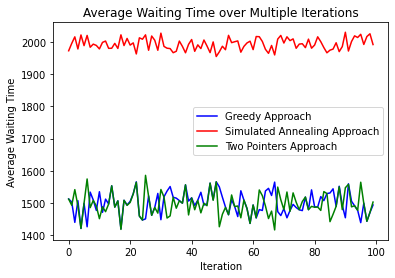

Greedy Approach: Average Waiting Time = 1498.4955690139084
Two Pointers Approach: Average Waiting Time = 1495.5130122862122
Simulated Annealing Approach: Average Waiting Time = 1994.2994185385157


In [237]:
def plot_results(greedy_avg_times, simulated_annealing_avg_times, two_pointers_avg_times):
    plt.plot(greedy_avg_times, label="Greedy Approach", color="blue")
    plt.plot(simulated_annealing_avg_times, label="Simulated Annealing Approach", color="red")
    plt.plot(two_pointers_avg_times, label="Two Pointers Approach", color="green")
    plt.xlabel("Iteration")
    plt.ylabel("Average Waiting Time")
    plt.title("Average Waiting Time over Multiple Iterations")
    plt.legend()
    plt.show()

# Simulation
greedy_avg_times, two_pointers_avg_times, simulated_annealing_avg_times = simulate()
plot_results(greedy_avg_times, simulated_annealing_avg_times, two_pointers_avg_times)

# Analysis
print("Greedy Approach: Average Waiting Time = {}".format(np.mean(greedy_avg_times)))
print("Two Pointers Approach: Average Waiting Time = {}".format(np.mean(two_pointers_avg_times)))
print("Simulated Annealing Approach: Average Waiting Time = {}".format(np.mean(simulated_annealing_avg_times)))


## Conclusion

The Greedy Approach and the Two Pointers Approach yielded similar average waiting times, with the Two Pointers Approach marginally outperforming the former. On the other hand, the Simulated Annealing Approach had a significantly higher waiting time, making it less optimal for this problem. Thus, the Two Pointers Approach stands out as the most efficient solution among the three.
